In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.stats import sem
from scipy.stats import stats

In [2]:
# read the crime data for the city of Manchester in August, 2018

file = ('Resources/final_manchester_crime_data.csv')
mc_pf = pd.read_csv(file)

mc_pf.head()

,Unnamed: 0,CrimeTS,Location,Type,Longitude,Latitude
0,0,2018-08-02 21:29:18,On or near Faraday Street,Violence and sexual offences,-2.125952,53.456924
1,1,2018-08-01 15:29:08,On or near Camborne Road,Violence and sexual offences,-2.445266,53.568947
2,2,2018-08-05 11:29:28,On or near Ashley Road,Criminal damage and arson,-2.354261,53.419073
3,3,2018-08-26 05:21:34,On or near Trust Road,Public order,-2.563494,53.536908
4,4,2018-08-16 01:16:35,On or near Back Elmwood Grove West,Violence and sexual offences,-2.199558,53.513226


In [3]:
# split the time data into date and time
crime_date = [x.split()[0] for x in mc_pf['CrimeTS']]
crime_time = [x.split()[1] for x in mc_pf['CrimeTS']]
mc_pf['Crime Date'] = crime_date
mc_pf['Crime Time'] = crime_time

# structure the time and date data into python datetime object
from datetime import datetime
import time
crime_TS = [datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S") for date_str in mc_pf['CrimeTS']]
mc_pf['CrimeTS'] = crime_TS
mc_pf.head()


,Unnamed: 0,CrimeTS,Location,Type,Longitude,Latitude,Crime Date,Crime Time
0,0,2018-08-02 21:29:18,On or near Faraday Street,Violence and sexual offences,-2.125952,53.456924,2018-08-02,21:29:18
1,1,2018-08-01 15:29:08,On or near Camborne Road,Violence and sexual offences,-2.445266,53.568947,2018-08-01,15:29:08
2,2,2018-08-05 11:29:28,On or near Ashley Road,Criminal damage and arson,-2.354261,53.419073,2018-08-05,11:29:28
3,3,2018-08-26 05:21:34,On or near Trust Road,Public order,-2.563494,53.536908,2018-08-26,05:21:34
4,4,2018-08-16 01:16:35,On or near Back Elmwood Grove West,Violence and sexual offences,-2.199558,53.513226,2018-08-16,01:16:35


In [4]:
# The crime rate data on the days of home games

mc_home_game_1 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-10',  :]
mc_home_game_2 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-19',  :]
mc_home_game_3 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-27',  :]

mc_home_game = pd.concat([mc_home_game_1, mc_home_game_2, mc_home_game_3])

# save the home game crime data
mc_home_game.to_csv('Resources/final_manchester_crime_data_home_game.csv')

In [5]:
# The crime rate data on the days of guest games

mc_guest_game_1 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-12',  :]
mc_guest_game_2 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-19',  :]
mc_guest_game_3 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-25',  :]

mc_guest_game = pd.concat([mc_guest_game_1, mc_guest_game_2, mc_guest_game_3])

# save the guest game crime data
mc_guest_game.to_csv('Resources/final_manchester_crime_data_guest_game.csv')

In [6]:
# The crime rate data on the days without games

game_days = ['2018-08-10', '2018-08-12', '2018-08-19', '2018-08-25', '2018-08-27']
mc_off_game = mc_pf
for game_day in game_days:
    mc_off_game =  mc_off_game[mc_off_game['Crime Date'] != game_day]

# save the off game day crime data
mc_off_game.to_csv('Resources/final_manchester_crime_data_off_game.csv')


In [9]:
# Group the data by crime date

grouped_date_mc_pf = mc_pf.groupby(['Crime Date'])

crime_counts = grouped_date_mc_pf['CrimeTS'].count()


# Crime data on each day of August, 2018

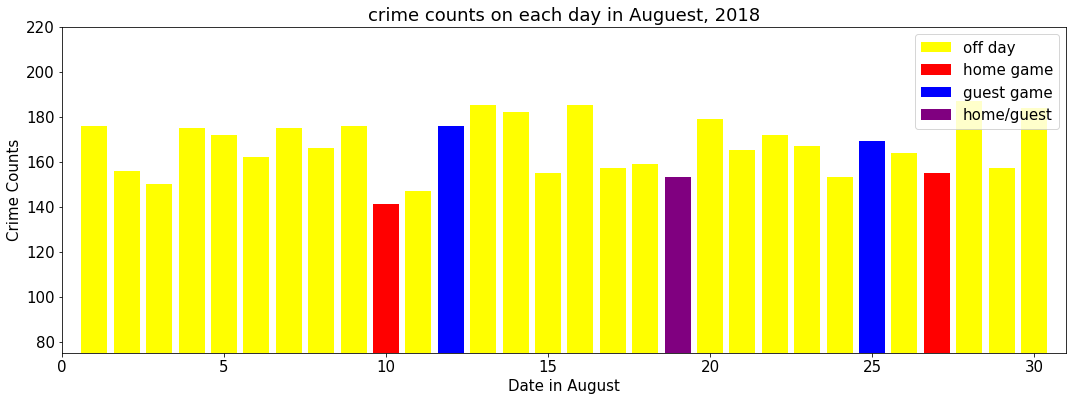

In [8]:
#plots for crime counts on each day in Auguest, 2018

time = np.arange(1, 31, 1)
fig = plt.figure()
fig.set_size_inches((18, 6))
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 15})


plt.bar(time, crime_counts, color = 'yellow', label = 'off day')
plt.bar([10, 27], (crime_counts[9], crime_counts[26]), color = 'red', label = 'home game' )
plt.bar([12, 25], (crime_counts[11], crime_counts[24]), color = 'blue', label = 'guest game'  )
plt.bar(19, crime_counts[18],  color = 'purple',  label = 'home/guest')
plt.xlim(0, 31)
plt.ylim(75, 220)
plt.title('crime counts on each day in Auguest, 2018')
plt.legend(loc = 'best')
plt.xlabel('Date in August')
plt.ylabel('Crime Counts')

plt.savefig('Images/august_crime.png')

* Home games were held on August 10, 19, and 27
* Away game were held on August 12, 19 and 25
* Home game for Manchester City and guest game for Mancehster United on August 19
* Crimes went down on home game days; however, the only day that crimes went down 

In [9]:
# Group the data by crime date based on data on home game days, guest game days, off days

# mean and sem for home game days
home_game_crime = mc_home_game.groupby(['Crime Date'])['CrimeTS'].count()

# mean and sem for guest game days
guest_game_crime = mc_guest_game.groupby(['Crime Date'])['CrimeTS'].count()

# mean and sem for off game days
off_game_crime = mc_off_game.groupby(['Crime Date'])['CrimeTS'].count()


In [10]:
# p-value for home_game_crime and off_game_crime

home_t, home_p = stats.ttest_ind(home_game_crime, off_game_crime, equal_var = False )
home_p = round(home_p, 6)
home_p

0.02769

In [17]:
# p-value for guest_game_crime and off_game_crime

guest_t, guest_p = stats.ttest_ind(guest_game_crime, off_game_crime, equal_var = False )
guest_p = round(guest_p, 6)
guest_p

0.780108

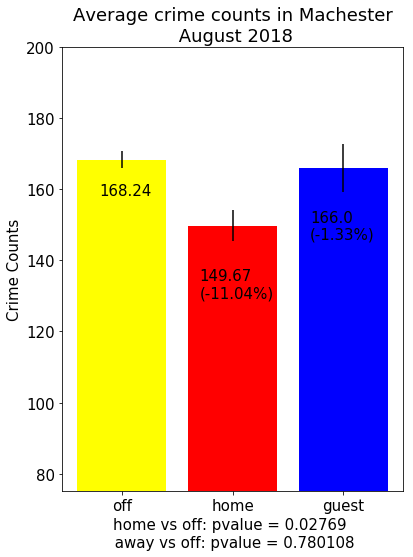

In [15]:
# plot the crime counts data accoring to data on home game days, guest game days, off days

fig = plt.figure()
fig.set_size_inches((6, 8))

rcParams.update({'font.size': 15})

mean_crime = [off_game_crime.mean(), home_game_crime.mean(), guest_game_crime.mean()]
sem_crime = [off_game_crime.sem(), home_game_crime.sem(), guest_game_crime.sem()]
color_crime = ['yellow', 'red', 'blue']


import matplotlib.pyplot as plt
plt.bar(x = [0, 1, 2], height = mean_crime, yerr = sem_crime,   color = color_crime )
home_percent_change = 100*(home_game_crime.mean()-off_game_crime.mean())/off_game_crime.mean()
guest_percent_change = 100*(guest_game_crime.mean()-off_game_crime.mean())/off_game_crime.mean()
plt.ylim(75, 200)
plt.ylabel('Crime Counts')
plt.xlabel(f'home vs off: pvalue = {home_p} \n away vs off: pvalue = {guest_p}')
plt.xticks([0.0, 1.0, 2.0], ['off', 'home', 'guest'])
plt.text(-0.2, off_game_crime.mean()-10, f'{round(off_game_crime.mean(), 2)}')
plt.text(0.7, home_game_crime.mean()-20, f'{round(home_game_crime.mean(), 2)}\n({round(home_percent_change,2)}%)')
plt.text(1.7, guest_game_crime.mean()-20, f'{round(guest_game_crime.mean(), 2)}\n({round(guest_percent_change,2)}%)')
plt.title('Average crime counts in Machester\n August 2018')
plt.savefig("Images/crime_counts_general_comparison.png")



# Analysis of crime subtypes

In [18]:
# analysis of crime by catogories, off days 

# list of crime types 
crime_type = ["Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", 
              "Possession of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", 
              "Vehicle crime", "Violence and sexual offences"]

off_crime_type_counts = []
off_crime_type_sem = []
off_crime_type_std = []

off_game_crime_type = mc_off_game.groupby(['Crime Date','Type'])['CrimeTS'].count().reset_index()
for i in crime_type:
    j = off_game_crime_type.loc[off_game_crime_type["Type"] == i, :]
    off_crime_type_counts.append(j.mean())
    off_crime_type_sem.append(j.sem())
    off_crime_type_std.append(j.std())
    
off_crime_type_counts = np.reshape(np.array(off_crime_type_counts), 13)
off_crime_type_sem = np.reshape(np.array(off_crime_type_sem), 13)
off_crime_type_std = np.reshape(np.array(off_crime_type_std), 13)

In [19]:
# analysis of crime by catogories, home games 

home_crime_type_counts = []
home_crime_type_sem = []
home_crime_type_std = []

home_game_crime_type = mc_home_game.groupby(['Crime Date','Type'])['CrimeTS'].count().reset_index()
for i in crime_type:
    j = home_game_crime_type.loc[home_game_crime_type["Type"] == i, :]
    home_crime_type_counts.append(j.mean())
    home_crime_type_sem.append(j.sem())
    home_crime_type_std.append(j.std())
    
home_crime_type_counts = np.reshape(np.array(home_crime_type_counts), 13)
home_crime_type_sem = np.reshape(np.array(home_crime_type_sem), 13)
home_crime_type_std = np.reshape(np.array(home_crime_type_std), 13)

In [20]:
# analysis of crime by catogories, away games 

guest_crime_type_counts = []
guest_crime_type_sem = []
guest_crime_type_std = []

guest_game_crime_type = mc_guest_game.groupby(['Crime Date','Type'])['CrimeTS'].count().reset_index()
for i in crime_type:
    j = guest_game_crime_type.loc[guest_game_crime_type["Type"] == i, :]
    guest_crime_type_counts.append(j.mean())
    guest_crime_type_sem.append(j.sem())
    guest_crime_type_std.append(j.std())
    
guest_crime_type_counts = np.reshape(np.array(guest_crime_type_counts), 13)
guest_crime_type_sem = np.reshape(np.array(guest_crime_type_sem),13)
guest_crime_type_std = np.reshape(np.array(guest_crime_type_std),13)

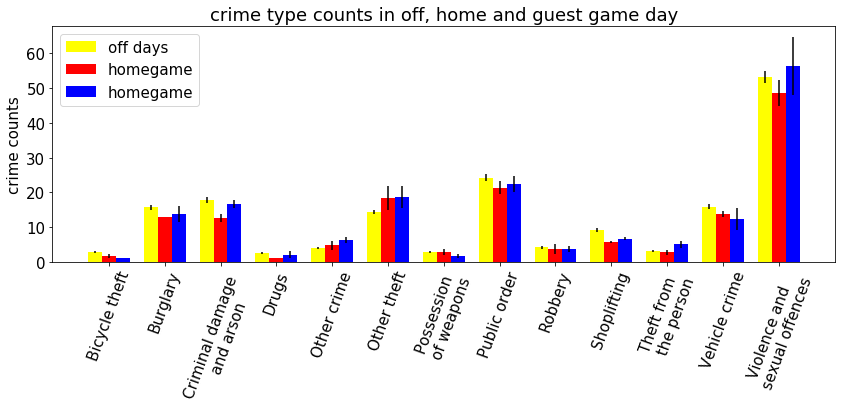

<Figure size 432x288 with 0 Axes>

In [21]:
# create plot

crime_types = ["Bicycle theft", "Burglary", "Criminal damage \n and arson", "Drugs", "Other crime", "Other theft", "Possession \nof weapons", "Public order", "Robbery", "Shoplifting", "Theft from \n the person", "Vehicle crime", "Violence and \n sexual offences"]
n_groups = 13
fig, ax = plt.subplots()
fig.set_size_inches((12, 6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(x = index, height = off_crime_type_counts, yerr = off_crime_type_sem, width = bar_width, 
                 color='yellow', label='off days')

rects2 = plt.bar(x = index + bar_width, height = home_crime_type_counts, yerr = home_crime_type_sem, width = bar_width, 
                 color='red', label='homegame')

rects2 = plt.bar(x = index + 2*bar_width, height = guest_crime_type_counts, yerr = guest_crime_type_sem, width = bar_width,
                 color='blue', label='homegame')


plt.ylabel('crime counts')
plt.title('crime type counts in off, home and guest game day')
plt.xticks(index + bar_width, crime_types, rotation = 70)
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig("Images/crime_type_comparison.png")

# Crime subtypes increasing or decreasing on home game days

In [22]:
# find the types of crimes which are significant different between off- and home-game days

from scipy.stats import ttest_ind_from_stats

# store the index, p_value and crime type in a list 
diff_off_home = []

# use individual t-test to determine the crimes which are statistical different in home-game days
for i in np.arange(13):
    t, p = ttest_ind_from_stats(mean1 = off_crime_type_counts[i], std1 = off_crime_type_std[i], nobs1 = 25, 
                                mean2 = home_crime_type_counts[i], std2 = home_crime_type_std[i], nobs2 =  3)
    if p <0.05:
        diff_off_home.append([i, p, crime_type[i]])

              
diff_off_home            

[[2, 0.04560405309282813, 'Criminal damage and arson'],
 [3, 0.029946933418083146, 'Drugs'],
 [5, 0.04590376712949329, 'Other theft'],
 [9, 0.04940925008809658, 'Shoplifting']]

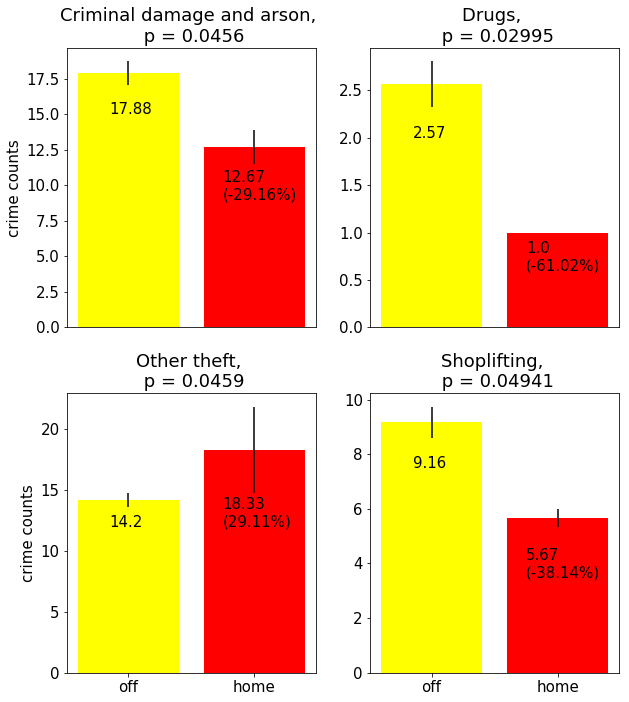

In [23]:
# plot the crime changes which are significant different between the off day and game day

f, ax = plt.subplots(2, 2)
f.set_size_inches((9, 10))
x = np.arange(2)
day_categories = [off_crime_type_counts, home_crime_type_counts]
day_categories_sem = [off_crime_type_sem, home_crime_type_sem]
colors = ['yellow', 'red']

axes = (ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1])
types = (diff_off_home[0][2], diff_off_home[1][2], diff_off_home[2][2], diff_off_home[3][2])
p_val = (round(diff_off_home[0][1], 5), round(diff_off_home[1][1], 5), round(diff_off_home[2][1], 5), round(diff_off_home[3][1], 5))
type_index = (diff_off_home[0][0], diff_off_home[1][0], diff_off_home[2][0], diff_off_home[3][0])

# calculate the percentage change for each crime, off days vs home-game days
percent_type = []

for i in type_index:
    j = round(100*(home_crime_type_counts[i] - off_crime_type_counts[i])/off_crime_type_counts[i], 2)
    percent_type.append(j)
    
# plot the bar chart for each crime,off days vs home-game days   
for i in np.arange(len(axes)):
    axes[i].bar(x = x, height = [cat[type_index[i]] for cat in day_categories], 
                         yerr = [cat_sem[type_index[i]] for cat_sem in day_categories_sem], color = colors )
    axes[i].set_title(f'{types[i]}, \n p = {p_val[i]}')
    axes[i].set_xticks([])
    

axes[0].set_ylabel('crime counts')
axes[2].set_ylabel('crime counts')

axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['off', 'home'])

axes[3].set_xticks([0, 1])
axes[3].set_xticklabels(['off', 'home'])

axes[0].text(-0.15, 15, f'{off_crime_type_counts[type_index[0]]}')
axes[0].text(0.75, 9, f'{round(home_crime_type_counts[type_index[0]], 2)}\n({percent_type[0]}%)')

axes[1].text(-0.15, 2, f'{round(off_crime_type_counts[type_index[1]], 2)}')
axes[1].text(0.75, 0.6, f'{round(home_crime_type_counts[type_index[1]], 2)}\n({percent_type[1]}%)')

axes[2].text(-0.15, 12, f'{round(off_crime_type_counts[type_index[2]], 2)}')
axes[2].text(0.75, 12, f'{round(home_crime_type_counts[type_index[2]], 2)}\n({percent_type[2]}%)')

axes[3].text(-0.15, 7.5, f'{round(off_crime_type_counts[type_index[3]], 2)}')
axes[3].text(0.75, 3.5, f'{round(home_crime_type_counts[type_index[3]], 2)}\n({percent_type[3]}%)')
plt.savefig('Images/subtypes_crime_home.png')


# Crime subtypes increasing or decreasing on home game days

In [24]:
# finding the subtypes which are statiticallly different between away-game days and off days

diff_off_guest = []

for i in np.arange(13):
    t, p = ttest_ind_from_stats(mean1 = off_crime_type_counts[i], std1 = off_crime_type_std[i], nobs1 = 25, 
                                mean2 = guest_crime_type_counts[i], std2 = guest_crime_type_std[i], nobs2 =  3)
    if p <0.05:
        diff_off_guest.append([i, p, crime_type[i]])

              
diff_off_guest       

[[4, 0.007214967125526608, 'Other crime'],
 [5, 0.0280421291058585, 'Other theft']]

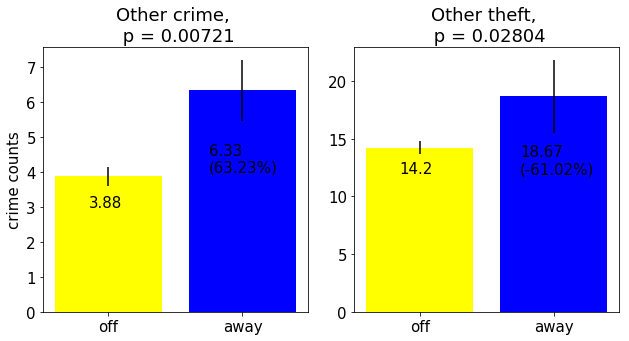

In [25]:
# plot the crime changes which are significant different between the off day and game day

f, ax = plt.subplots(1, 2)
f.set_size_inches((9, 5))
x = np.arange(2)
day_categories = [off_crime_type_counts, guest_crime_type_counts]
day_categories_sem = [off_crime_type_sem, guest_crime_type_sem]
colors = ['yellow', 'blue']

axes = (ax[0], ax[1])
types = (diff_off_guest[0][2], diff_off_guest[1][2])
p_val = (round(diff_off_guest[0][1], 5), round(diff_off_guest[1][1], 5))
type_index = (diff_off_guest[0][0], diff_off_guest[1][0])

# calculate the percentage change for each crime, off days vs home-game days

g_percent_type = []

for i in type_index:
    j = round(100*(guest_crime_type_counts[i] - off_crime_type_counts[i])/off_crime_type_counts[i], 2)
    g_percent_type.append(j)
    
# plot the bar chart for each crime,off days vs home-game days   
for i in np.arange(len(axes)):
    axes[i].bar(x = x, height = [cat[type_index[i]] for cat in day_categories], 
                         yerr = [cat_sem[type_index[i]] for cat_sem in day_categories_sem], color = colors )
    axes[i].set_title(f'{types[i]}, \n p = {p_val[i]}')
    axes[i].set_xticks([])
    

axes[0].set_ylabel('crime counts')


axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['off', 'away'])

axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['off', 'away'])

axes[0].text(-0.15, 3, f'{off_crime_type_counts[type_index[0]]}')
axes[0].text(0.75, 4, f'{round(guest_crime_type_counts[type_index[0]], 2)}\n({g_percent_type[0]}%)')

axes[1].text(-0.15, 12, f'{round(off_crime_type_counts[type_index[1]], 2)}')
axes[1].text(0.75, 12, f'{round(guest_crime_type_counts[type_index[1]], 2)}\n({percent_type[1]}%)')


plt.savefig('Images/subtypes_crime_guest.png')


In [44]:
home_crime_type_percentage_change = 100*(home_crime_type_counts-off_crime_type_counts)/off_crime_type_counts
home_crime_type_percentage_change

array([-39.89071038, -16.8797954 , -29.15734526, -61.01694915,
        20.27491409,  29.10798122,  -3.82513661, -11.69977925,
       -11.85897436, -38.13682678, -11.11111111, -13.93786734,
        -8.45247053])

In [45]:
guest_crime_type_percentage_change = 100*(guest_crime_type_counts-off_crime_type_counts)/off_crime_type_counts
guest_crime_type_percentage_change

array([-63.93442623, -12.6172208 ,  -6.78598061, -22.03389831,
        63.23024055,  31.45539906, -39.89071038,  -7.5607064 ,
       -11.85897436, -27.21979622,  66.66666667, -22.33417296,
         5.96940055])

# gmap analysis of crime data

In [12]:
# include the day  in the data frame
crime_day = [ct.day for ct in mc_pf['CrimeTS']]
mc_pf_day = mc_pf
mc_pf_day['Crime Day'] = crime_day
mc_pf_day.head()

,Unnamed: 0,CrimeTS,Location,Type,Longitude,Latitude,Crime Date,Crime Time,Crime Day
0,0,2018-08-02 21:29:18,On or near Faraday Street,Violence and sexual offences,-2.125952,53.456924,2018-08-02,21:29:18,2
1,1,2018-08-01 15:29:08,On or near Camborne Road,Violence and sexual offences,-2.445266,53.568947,2018-08-01,15:29:08,1
2,2,2018-08-05 11:29:28,On or near Ashley Road,Criminal damage and arson,-2.354261,53.419073,2018-08-05,11:29:28,5
3,3,2018-08-26 05:21:34,On or near Trust Road,Public order,-2.563494,53.536908,2018-08-26,05:21:34,26
4,4,2018-08-16 01:16:35,On or near Back Elmwood Grove West,Violence and sexual offences,-2.199558,53.513226,2018-08-16,01:16:35,16


# heatmap for crimes on home game, away game and off game days

In [22]:
# Crime Heatmap for off day

import gmaps
from config import gkey


# lat and lon of the crime location
manchester_coordinates = (53.4808, -2.2426)
#off_day_data = mc_off_game[mc_off_game['CrimeDay'] = 1]
off_day_location = mc_off_game[['Latitude', 'Longitude']]

# lat and lon of the two statiums
etihad_stadium = [53.4831, -2.2004,]
old_trafford = [53.4631, -2.2913,]
marker_locations = [etihad_stadium, old_trafford]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(off_day_location)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)


fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
# Crime Heatmap for home game 

import gmaps
from config import gkey

# lat and lon of the crime location
manchester_coordinates = (53.4808, -2.2426)
game_day_location = mc_home_game[['Latitude', 'Longitude']]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(game_day_location)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
# Crime Heatmap for guest game 

# lat and lon of the crime location
guest_day_location = mc_guest_game[['Latitude', 'Longitude',]]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(guest_day_location)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
# print categories of crimes 

mc_home_game['Type'].unique()

array(['Violence and sexual offences', 'Burglary', 'Other theft',
       'Criminal damage and arson', 'Public order', 'Shoplifting',
       'Vehicle crime', 'Other crime', 'Theft from the person',
       'Bicycle theft', 'Drugs', 'Possession of weapons', 'Robbery'],
      dtype=object)

In [85]:
# Crime maps for home game, by category

import gmaps
from config import gkey

# lat and lon of the crime location
game_day_location = mc_home_game[mc_home_game['Type'] == 'Drugs' ][['Latitude', 'Longitude']]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
symbol_layer = gmaps.symbol_layer(game_day_location, fill_color='red', stroke_color='green', scale=3)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(symbol_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
# Crime maps for guest game day, by category

import gmaps
from config import gkey

# lat and lon of the crime location
game_day_location = mc_guest_game[mc_guest_game['Type'] == 'Robbery' ][['Latitude', 'Longitude']]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
symbol_layer = gmaps.symbol_layer(game_day_location, fill_color='red', stroke_color='green', scale=3)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(symbol_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
# Crime Heatmap, by day
import gmaps
from config import gkey


# lat and lon of the crime location
manchester_coordinates = (53.4808, -2.2426)

# location for each crime
day_location = mc_pf_day[mc_pf_day['Crime Day'] ==15][['Latitude', 'Longitude']]

# lat and lon of the two statiums
etihad_stadium = [53.4831, -2.2004]
old_trafford = [53.4631, -2.2913]
marker_locations = [etihad_stadium, old_trafford]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=12)
symbol_layer = gmaps.symbol_layer(day_location, fill_color='red', stroke_color='green', scale=3)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(symbol_layer)
fig


Figure(layout=FigureLayout(height='420px'))

# crimes committed within 2km of the stadium at the home games

In [73]:
# crimes around 2km radius of the stadium at the game day
# the Machester United stadium

old_trafford = [53.4631, -2.2913,] # Machester United Stadium 

# distance between crime location and the stadium
import geopy.distance

def crime_dis(lat, lon, stadium):
    coords_1 = (lat, lon)
    coords_2 = (stadium)
    return geopy.distance.geodesic(coords_1, coords_2).km

crime_mu = [] #  list for every day crime around the Machester United stadium 

for i in np.arange(1, 31, 1):
    j = 0
    df = mc_pf_day[mc_pf_day['Crime Day'] == i]
    df = pd.DataFrame(df)
    for index, row in df.iterrows():
        if crime_dis(row['Latitude'], row['Longitude'], old_trafford) <= 2:
            j += 1
    crime_mu.append(j)



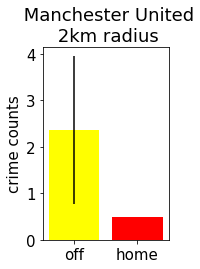

In [96]:
# Machester Uniter crime around the Machester United stadium, home game Auguset 10, 27

crime_mu_home = (crime_mu[9] + crime_mu[26])/2
crime_mu_off = np.array(crime_mu)
crime_mu_off = np.delete(crime_mu_off, (9, 26))

# bar plot for crime cound winthin 2km of the Machester United stadium, home game Auguset 10, 27

fig = plt.figure()
fig.set_size_inches((3, 4))


plt.bar(0, crime_mu_off.mean(), yerr = crime_mu_off.std(), color = 'yellow')
plt.bar(1, crime_mu_home, color = 'red')
plt.title(' Manchester United\n 2km radius')
plt.ylabel('crime counts')
plt.xticks([0, 1], ['off', 'home'])
rcParams.update({'figure.autolayout': True})
plt.savefig('Images/Manchester_united_2km.png')

In [72]:
crime_mu_home = (crime_mu[9] + crime_mu[26])/2
crime_mu_home

2.0

In [78]:
# crimes around 2km radius of the stadium at the game day
# the Machester City stadium
etihad_stadium = [53.4831, -2.2004]

crime_mc = [] #  list for every day crime around the Machester City stadium 

for i in np.arange(1, 31, 1):
    j = 0
    df = mc_pf_day[mc_pf_day['Crime Day'] == i]
    df = pd.DataFrame(df)
    for index, row in df.iterrows():
        if crime_dis(row['Latitude'], row['Longitude'], etihad_stadium) <= 2:
            j += 1
    crime_mc.append(j)


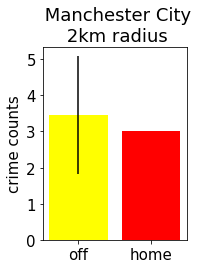

In [97]:
# Machester Uniter crime around the Machester United stadium, home game Auguset 10, 27

crime_mc_home = crime_mc[18] 
crime_mc_off = np.array(crime_mc)
crime_mc_off = np.delete(crime_mc_off, 18)

# bar plot for crime cound winthin 2km of the Machester city stadium, home game Auguset 10, 27

fig = plt.figure()
fig.set_size_inches((3, 4))


plt.bar(0, crime_mc_off.mean(), yerr = crime_mc_off.std(), color = 'yellow')
plt.bar(1, crime_mc_home, color = 'red')
plt.title(' Manchester City\n 2km radius')
plt.ylabel('crime counts')
plt.xticks([0, 1], ['off', 'home'])
rcParams.update({'figure.autolayout': True})
plt.savefig('Images/Manchester_city_2km.png')